# Signal to Noise Ratio 信噪比

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

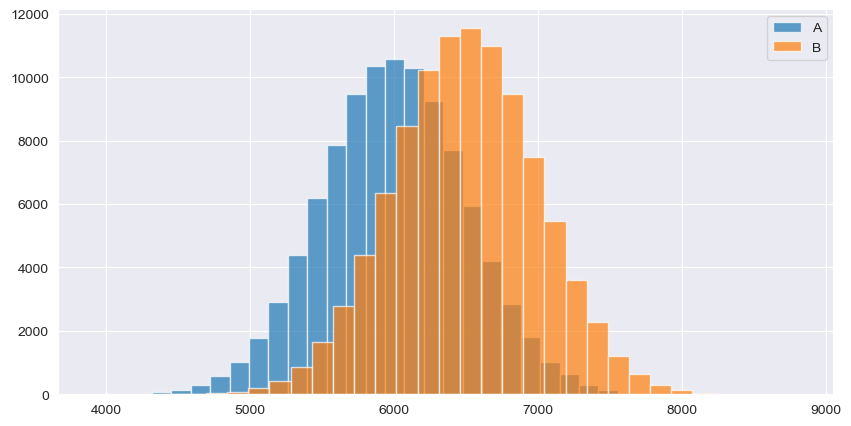

In [14]:
# 模拟信噪比, 构建两个城市的工资数据
city_A = np.random.normal(6000, 500, 100000)
city_B = np.random.normal(6500, 500, 100000)
plt.figure(figsize=(10,5))
plt.hist(city_A, alpha=0.7, bins=30, label='A')
plt.hist(city_B, alpha=0.7, bins=30, label='B')
plt.legend(loc='best')
plt.show()

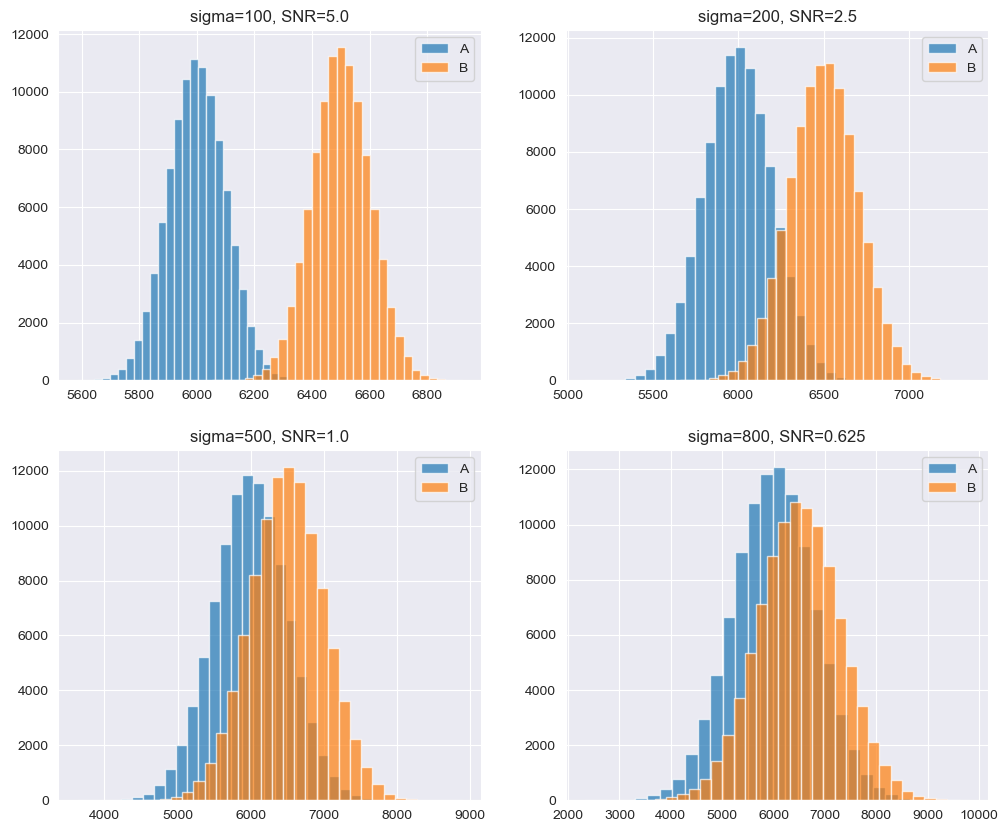

In [23]:
# uA 和 uB 之间相差 500， 把这个500设置为 '信号'
# 本例采用简化版信噪比 = （uA - uB）/ sigma
# 在AB样本标准差相同，使之具有'方差齐性'。 通过改变标准差，也就是改变内部噪音（sigmaA = sigmaB = 100 or 200 or 500 or 800），来比较两个总体的分布。

sigma_lst = [100,200,500,800]
fig = plt.figure(figsize=(12,10))
for index, sigma in enumerate(sigma_lst):
    SNR = 500 / sigma
    title = 'sigma='+str(sigma)+', SNR='+str(SNR)
    ax = fig.add_subplot(2, 2, index+1)
    city_A = np.random.normal(6000, sigma, 100000)
    city_B = np.random.normal(6500, sigma, 100000)
    ax.hist(city_A, alpha=0.7, bins=30, label='A')
    ax.hist(city_B, alpha=0.7, bins=30, label='B')
    plt.legend(loc='best')
    plt.title(title)

# 信噪比越小，样本分布越重合，两个总体的均值没有显著差别

- 以上是信噪比在统计学中,比较两个总体均值是否有显著差别时的应用。信号,就是两个总体均值的差值;噪音,就是总体本身的数据离散程度,(也就是标准差sigma,仅限于本案例中)。

## 双样本t检验 信噪比

In [24]:
from IPython.display import Image
Image(url="WechatIMG48.png", width=300, height=300)

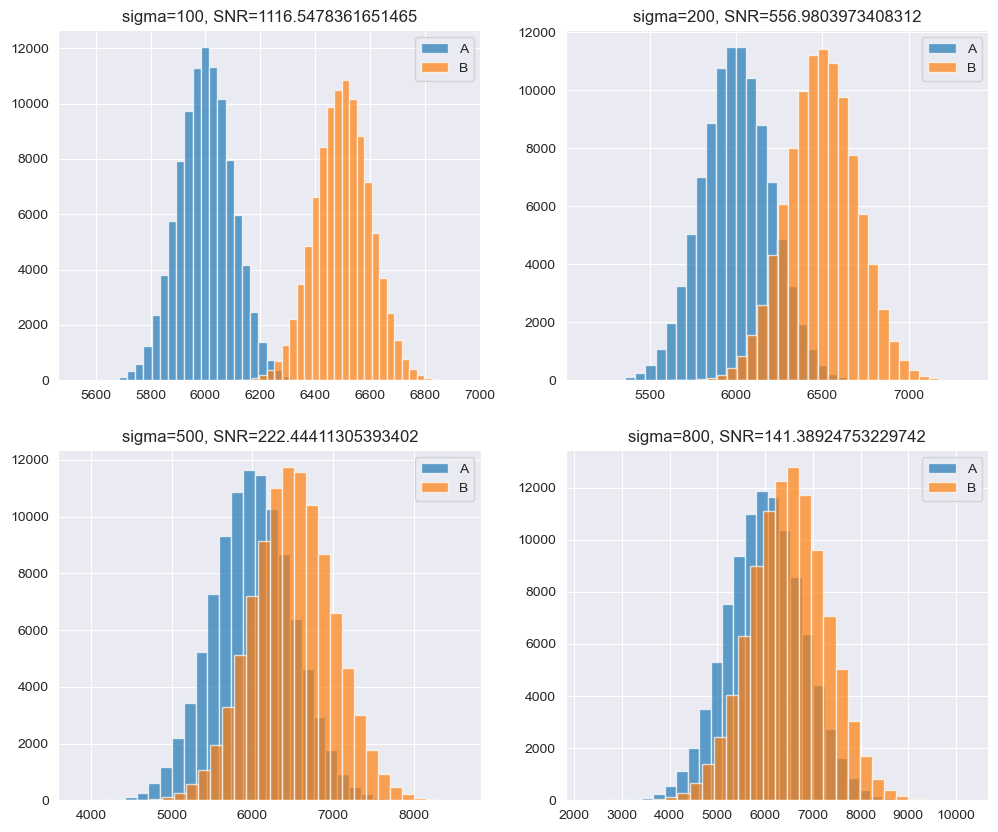

In [38]:
# 双样本t检验下的 信噪比计算
sigma_lst = [100,200,500,800]
fig = plt.figure(figsize=(12,10))
for index, sigma in enumerate(sigma_lst):
    ax = fig.add_subplot(2, 2, index+1)
    city_A = np.random.normal(6000, sigma, 100000)
    city_B = np.random.normal(6500, sigma, 100000)
    ax.hist(city_A, alpha=0.7, bins=30, label='A')
    ax.hist(city_B, alpha=0.7, bins=30, label='B')
    SNR, p = stats.ttest_ind(city_A, city_B)
    title = 'sigma='+str(sigma)+', SNR='+str(abs(SNR))
    plt.legend(loc='best')
    plt.title(title)

# 信噪比越小，样本分布越重合，两个总体的均值没有显著差别